# 第I部
# 第5章 統計的仮設検定

In [2]:
options(repr.plot.width= 4, repr.plot.height = 4)

## 5.3 標準正規分布を用いた検定

* 検定統計量は $Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}}$

### 例題

* 心理学テストの母集団分布は $\bar{X} \approx N \left( \mu, \frac{\sigma^2}{n}\right) $
* 標準化すると， $Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \approx N(0, 1)$

In [1]:
library(readr)

In [5]:
d <- read_csv("teaching_methods.csv") # UTF-8
d

,ID,名前,性別,数学,統計,心理学テスト,統計テスト1,統計テスト2,指導法
1,1,大村,男,嫌い,好き,13,6,10,C
2,2,本多,男,嫌い,好き,14,10,13,B
3,3,川崎,男,好き,好き,7,6,8,B
4,4,多村,男,好き,好き,12,10,15,A
5,5,松中,男,嫌い,嫌い,10,5,8,B
6,6,小久保,男,嫌い,嫌い,6,3,6,C
7,7,柴原,男,嫌い,嫌い,8,5,9,A
8,8,井手,男,嫌い,嫌い,15,9,10,D
9,9,田上,男,嫌い,嫌い,4,3,7,D
10,10,松田,男,好き,嫌い,14,3,3,D


In [9]:
names(d) <- c("id", "name", "gender", "math", "stat", "psy_test", "stat_test1", "stat_test2", "teach_method")
d

,id,name,gender,math,stat,psy_test,stat_test1,stat_test2,teach_method
1,1,大村,男,嫌い,好き,13,6,10,C
2,2,本多,男,嫌い,好き,14,10,13,B
3,3,川崎,男,好き,好き,7,6,8,B
4,4,多村,男,好き,好き,12,10,15,A
5,5,松中,男,嫌い,嫌い,10,5,8,B
6,6,小久保,男,嫌い,嫌い,6,3,6,C
7,7,柴原,男,嫌い,嫌い,8,5,9,A
8,8,井手,男,嫌い,嫌い,15,9,10,D
9,9,田上,男,嫌い,嫌い,4,3,7,D
10,10,松田,男,好き,嫌い,14,3,3,D


In [10]:
psy_test <- d$psy_test

（4） 統計検定量の計算

In [3]:
z <- (mean(psy_test) - 12) / (sqrt(10 / length(psy_test)))
z

[1] -2.828427

棄却域を計算する  
上側確率は，

In [4]:
qnorm(1 - 0.05 / 2)

[1] 1.959964

下側確率は，

In [5]:
qnorm(0.05 / 2)

[1] -1.959964

棄却域は，  
$Z \lt -1.95996$, $Z \gt 1.95996$

In [12]:
library(ggplot2)

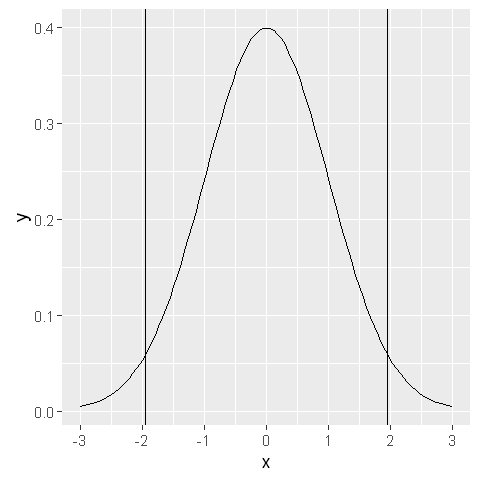

In [7]:
ggplot(data.frame(x = c(-3, 3)), aes(x)) +
    stat_function(fun = dnorm, args = list(mean = 0, sd = 1)) + 
    scale_x_continuous(breaks = c(-3:3, 1)) + 
    geom_vline(xintercept = c(qnorm(0.025), qnorm(0.975)))

$p$値を計算する．  
検定統計量z が左側の棄却域に入る確率は，

In [8]:
pnorm(z)

[1] 0.002338867

両側検定なので，

In [10]:
2 * pnorm(-z, lower.tail = FALSE)

[1] 0.004677735

$p$値が有意水準0.05より小さいので，帰無仮説は棄却される.  
(標本平均は母平均と等しいとは言えない)

## 5.4 $t$分布 を用いた検定

$t = \frac{\bar{X} - \mu}{\hat{\sigma} / \sqrt{n}}$

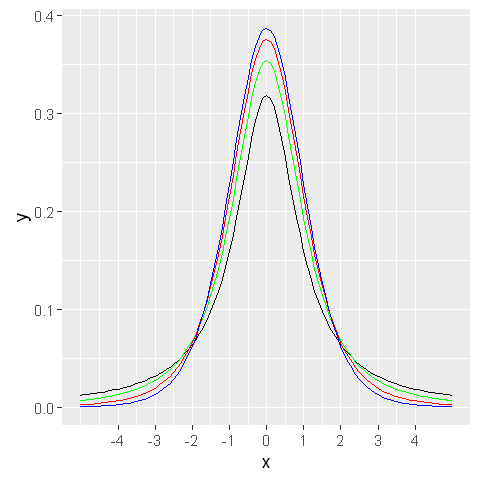

In [16]:
ggplot(data.frame(x = c(-5, 5)), aes(x)) +
    stat_function(fun = dt, args = list(df = 1)) + 
    stat_function(fun = dt, args = list(df = 2), col = "green") + 
    stat_function(fun = dt, args = list(df = 4), col = "red") + 
    stat_function(fun = dt, args = list(df = 8), col = "blue") + 
    scale_x_continuous(breaks = c(-4:4, 1))

母集団分布は， $N(12, \sigma^2)$  
検定統計量$t$は，

In [19]:
t <- (mean(psy_test) - 12) / sqrt(var(psy_test) / length(psy_test))
t

[1] -2.616648

棄却域は，

In [26]:
lower <- qt(0.05 / 2, df = length(psy_test) - 1)
upper <- qt(0.05 / 2, df = length(psy_test) - 1, lower.tail = FALSE)
cat("t < ", lower, ", t > ", upper)

t <  -2.093024 , t >  2.093024

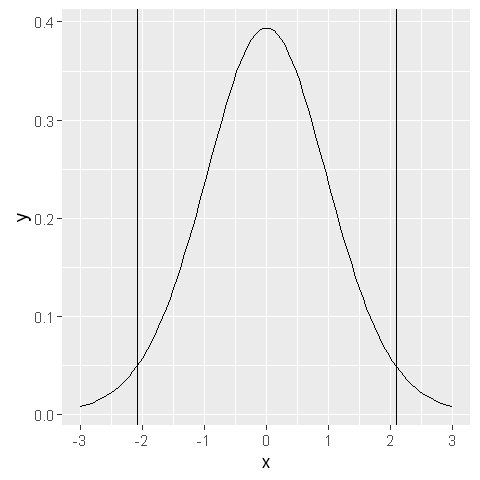

In [33]:
ggplot(data.frame(x = c(-3, 3)), aes(x)) +
    stat_function(fun = dt, args = list(df = 19)) + 
    scale_x_continuous(breaks = c(-3:3, 1)) + 
    geom_vline(xintercept = c(qt(0.025, df = 19), qt(0.975, df = 19)))

帰無仮説は棄却された

$p$ 値は，

In [30]:
2 * pt(t, df = length(psy_test) - 1)

[1] 0.01697092

`t.test()` で計算

In [34]:
t.test(psy_test, mu = 12)


	One Sample t-test

data:  psy_test
t = -2.6166, df = 19, p-value = 0.01697
alternative hypothesis: true mean is not equal to 12
95 percent confidence interval:
  8.400225 11.599775
sample estimates:
mean of x 
       10 


## 5.5 相関係数の検定

In [11]:
devtools::session_info()

Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------
Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------


 setting  value                       
 version  R version 3.2.3 (2015-12-10)
 system   x86_64, mingw32             
 ui       RTerm                       
 language en                          
 collate  Japanese_Japan.932          
 tz       Asia/Tokyo                  
 date     2016-05-17                  

 package    * version date       source                            
 base64enc    0.1-3   2015-07-28 CRAN (R 3.2.2)                    
 colorspace   1.2-6   2015-03-11 CRAN (R 3.2.1)                    
 devtools     1.10.0  2016-01-23 CRAN (R 3.2.3)                    
 digest       0.6.9   2016-01-08 CRAN (R 3.2.3)                    
 evaluate     0.8     2015-09-18 CRAN (R 3.2.2)                    
 ggplot2    * 2.0.0   2015-12-18 CRAN (R 3.2.3)                    
 gtable       0.1.2   2012-12-05 CRAN (R 3.2.1)                    
 IRdisplay    0.3     2015-04-27 local                             
 IRkernel     0.6     2016-02-08 Github (IRkernel/IRkernel@40dc791)
 jsonli